Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Find Sample Mean and Median 

In [32]:
values = [4.3, 5.2, 5.0, 3.8, 4.1, 5.5, 1.9]
  
# here we compute the mean
sum_values = 0
for a in values:
    sum_values += a
mean = sum_values/len(values)
# next we compute the median
values.sort()
if len(values)%2 == 0:
    median = (values[len(values)//2]+values[(len(values)//2)-1])/2
else:
    median = values[len(values)//2]
print("The mean of the given data set is: ", mean)
print("The median of the given data set is: ", median)
#****************************************************************
#BUILT INS
mean2 = np.mean(values)
median2 = np.median(values)
print("The mean of the given data set is: ", mean2)
print("The median of the given data set is: ", median2)

The mean of the given data set is:  4.257142857142857
The median of the given data set is:  4.3
The mean of the given data set is:  4.257142857142857
The median of the given data set is:  4.3


Standard Deviation STD

In [49]:
print("std of arr : ", np.std(values, dtype = np.float32)) 

std of arr :  1.1197667


Create Blank DataFrame

In [33]:
info = pd.DataFrame()    
print (info)    

Empty DataFrame
Columns: []
Index: []


Create dataframe from csv

In [34]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


UNIQUE

In [46]:
arr = df['Pclass'].unique()
print(arr)

[3 1 2]


Drop NA

In [35]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
#dfTitanic = df.dropna() for all
dfTitanic.head()
len(dfTitanic)

714

GET SPECIFIC COLUMNS AND GROUPING

In [36]:
#Cuts to just Pclass Sex and Survived columns
titanic_Pclass_Survived_Sex = dfTitanic.loc[:, ["Pclass", "Sex", "Survived"]]
#Add Total Passangers column with all values = 1
titanic_Pclass_Survived_Sex["TotalPassengers"] = 1                                          

                                            
#Groups the values first into Pclass then Sex See https://www.geeksforgeeks.org/sql-group-by/
#for explanation of what group by statements do (this is a sql example but its the same idea in pandas)
#Sums all numeric columns for groups

SurvivalRates = titanic_Pclass_Survived_Sex.groupby(["Pclass", "Sex"]).sum()

#Adds new column with rates
SurvivalRates["SurvivalRate"] = SurvivalRates["Survived"] / SurvivalRates["TotalPassengers"]

print(SurvivalRates)

               Survived  TotalPassengers  SurvivalRate
Pclass Sex                                            
1      female        72               75      0.960000
       male          36               93      0.387097
2      female        54               58      0.931034
       male          16               87      0.183908
3      female        62              118      0.525424
       male          39              283      0.137809


HISTOGRAM

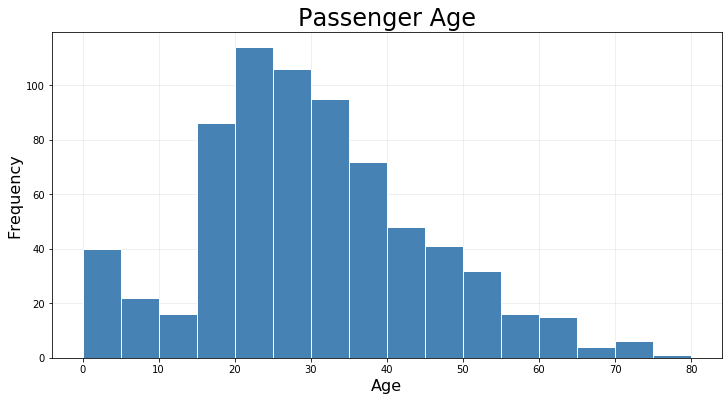

In [37]:
my_bins = range(0,85,5)

fig, ax = plt.subplots(figsize=(12,6))
dfTitanic.hist(column="Age", ax=ax, facecolor="steelblue", edgecolor="white",bins=my_bins)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Passenger Age", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

LAYER HISTOGRAM

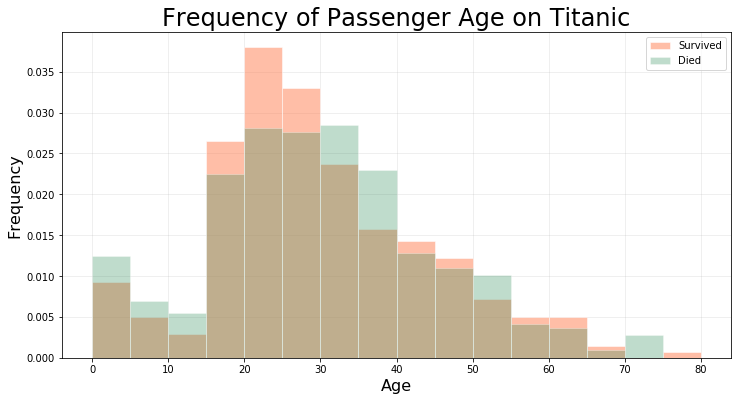

In [38]:
bins = range(0,85,5)
fig, ax = plt.subplots(figsize=(12,6))
#dfTitanic.hist(column="Age", ax=ax, facecolor="steelblue", edgecolor="white",bins=bins, label="All passengers", alpha=0.5, density=True)
dfTitanic.loc[dfTitanic["Survived"]==1].hist(column="Age", ax=ax, facecolor="coral", edgecolor="white",bins=bins, alpha=0.5, label="Survived", density=True)
dfTitanic.loc[dfTitanic["Survived"]==0].hist(column="Age", ax=ax, facecolor="seagreen", edgecolor="white",bins=bins, alpha=0.3, label="Died", density=True)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Frequency of Passenger Age on Titanic", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend();

REPLACE

In [39]:
boulder_snow_data = pd.read_csv('Boulder_Snowfall.csv')
boulder_snow_data = boulder_snow_data.replace(r'T', 0, regex=True)
boulder_snow_data = boulder_snow_data.replace(r'(?<![0-9])[.](?![0-9])', np.NaN, regex=True)
dfclean = boulder_snow_data.dropna()

LINE PLOT

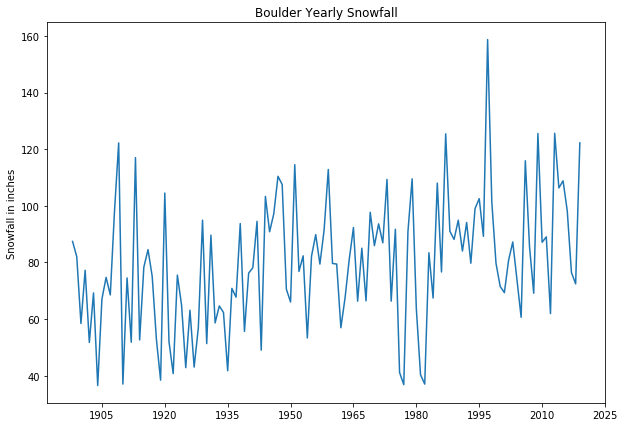

In [41]:
dfclean = dfclean.apply(pd.to_numeric)

y = dfclean["Total Jan-Dec"]
x = dfclean["Year"]

fig = plt.figure(figsize=(10, 7))
ax = plt.axes()

ax.set_ylabel("Snowfall in inches")
ax.set_title("Boulder Yearly Snowfall")

ax.plot(x,y)
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.show()

HISTOGRAM

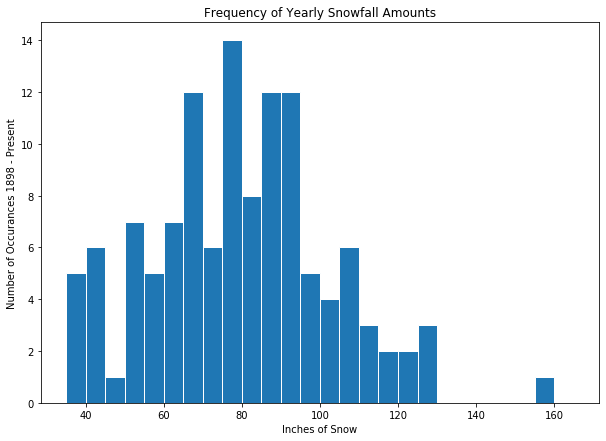

In [42]:
mybins = range(35, 170, 5)
fig, ax = plt.subplots(figsize=(10, 7))
plt.hist(y, bins=mybins, edgecolor = 'white');
plt.title("Frequency of Yearly Snowfall Amounts")
plt.ylabel("Number of Occurances 1898 - Present")
plt.xlabel("Inches of Snow")
plt.show()

Print Single Row Content

In [43]:
dfclean.loc[dfclean["Year"] == 2019]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total Sep-Jun,Total Jan-Dec
127,2019,14.5,14.6,16.2,10.2,7.4,0.0,0,0,0.0,26.4,29.5,3.4,59.3,122.2


BOX PLOT

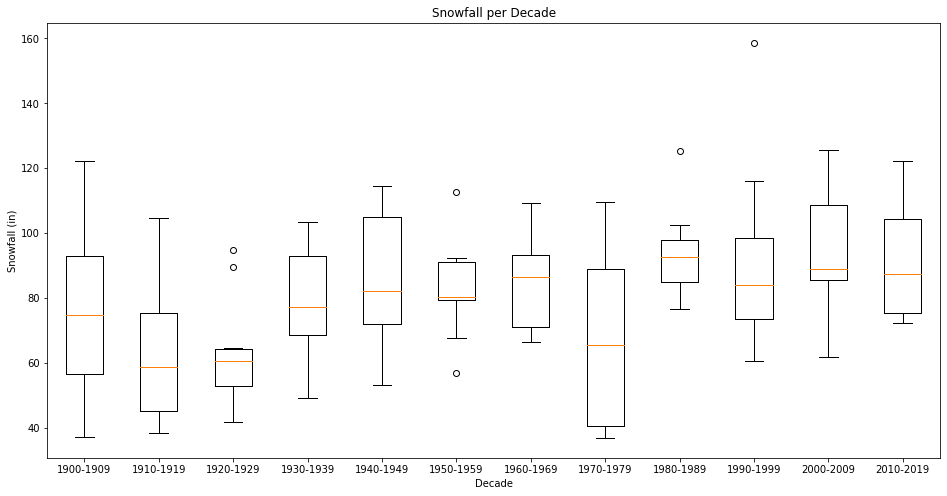

In [44]:
starting_row_index = (dfclean.loc[dfclean["Year"]==1900]).index
starting_row_index = starting_row_index[0]
ending_row_index = starting_row_index+10

# Organizing data into a list of lists for the first 10 decades.
list_of_decades = []
for i in range(1,11):
    
    decade = np.array(dfclean.iloc[starting_row_index:ending_row_index, -1])
    
    list_of_decades.append(decade)
    
    starting_row_index = ending_row_index
    ending_row_index = starting_row_index+10
    
    
# Handling decade with 2004 data missing.
decade_2004 = np.array(dfclean.iloc[starting_row_index:ending_row_index-1, -1])
list_of_decades.append(decade_2004)

# Handling the last decade of data
starting_row_index = ending_row_index-1
ending_row_index = starting_row_index+10
last_decade = np.array(dfclean.iloc[starting_row_index:ending_row_index, -1])
list_of_decades.append(last_decade)

decades = ['1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019']
    
fig,ax = plt.subplots(figsize=(16,8))

ax.boxplot(list_of_decades);

ax.set_xticklabels(decades);
ax.set_xlabel('Decade')
ax.set_ylabel("Snowfall (in)")
ax.set_title("Snowfall per Decade")

plt.show()

BOX PLOT

The mean snowfall in inches for February is:  11.402479338842973

The 5 number summary is: 
min =  0.0
Q1 = 5.4
median = 9.8
Q3 = 16.3
max = 54.6


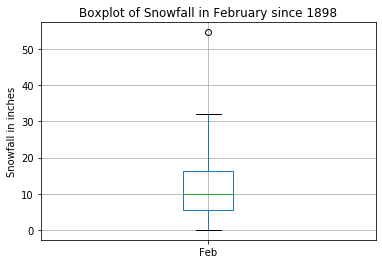

In [14]:
mean_february = dfclean["Feb"].mean()

tukey_summary = dfclean["Feb"].describe()
print("The mean snowfall in inches for February is: ", mean_february)
print("")
print("The 5 number summary is: ")
print("min = ", tukey_summary[3])
print("Q1 =", tukey_summary[4])
print("median =", tukey_summary[5])
print("Q3 =", tukey_summary[6])
print("max =", tukey_summary[7])

ax = dfclean.boxplot(column="Feb");
ax.set_ylabel("Snowfall in inches");
ax.set_title("Boxplot of Snowfall in February since 1898");
plt.show()

LINE PLOT

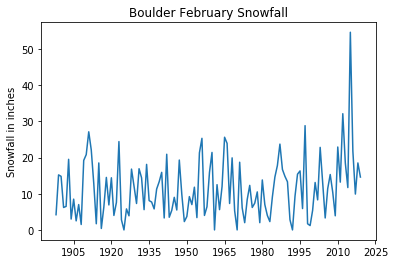

In [15]:
y = dfclean["Feb"]
x = dfclean["Year"]

fig = plt.figure()
ax = plt.axes()

ax.set_ylabel("Snowfall in inches")
ax.set_title("Boulder February Snowfall")

ax.plot(x,y)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.show()

FIND PERCENTILE

In [24]:
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50)  #Returns 50th percentile, e.g. median
print(p)

3.0


RANDOM NUM

In [26]:
import random
print(random.random())

0.8235853140309372


How to get indices of N maximum values in a NumPy array?

In [27]:
arr = np.array([1, 3, 2, 4, 5])
print(arr.argsort()[-3:][::-1])

[4 3 1]


In [ ]:
if __name__ == "__main__":
    main(tickerlist)

In [ ]:
ds_months = flu_interest.drop(columns=['Year'])
ds_months.groupby(['Month']).mean()

SCATTER PLOT & MAJOR LOCATOR FOR DATES & DATE FORMATTER

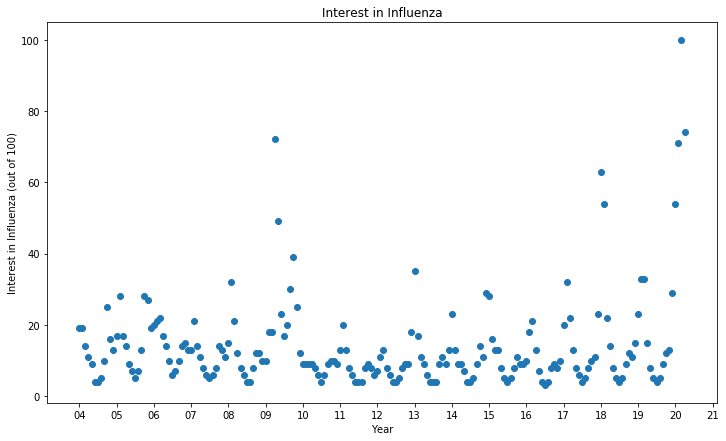

In [48]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

#Solution:

flu_interest = pd.read_csv('influenza_interest.csv')
flu_interest['Year'] = flu_interest['Month'].apply(lambda x: x[:4])
flu_interest['Month'] = flu_interest['Month'].apply(lambda x: x[5:])
df_to_print = flu_interest.copy()
df_to_print['time'] = pd.to_datetime({'day': 1,'month': flu_interest['Month'],'year': flu_interest['Year']})

# If students get an invalid type promotion error, try this:
interest = np.array(df_to_print['Interest'])
time = np.array(df_to_print['time'])

# Otherwise this should work:
#plt.scatter(df_to_print['time'], df_to_print['Interest'])

fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(time,interest)
date_form = DateFormatter("%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel("Year")
ax.set_ylabel("Interest in Influenza (out of 100)")
ax.set_title("Interest in Influenza")
plt.show()